In [1]:
import pandas as pd
import os
import itertools
import matplotlib.pyplot as plt
import scipy.spatial as sp, scipy.cluster.hierarchy as hc
import seaborn as sns
import Name_resolver
import numpy as np

In [2]:
file_list = os.listdir('/data/passala/Coexpressolog_paper_data/Updated_with_V_11/Species_species_gene_tables')
locations = pd.read_csv('/data/passala/git/Coexpressalog_Method_Development/Cross_all_species/map_of_ortholog_map_locations.csv', index_col= 0)


In [3]:
def get_one_to_ones(Species_1 = 'rice',Species_2 = 'maize'):

    import pandas as pd
    import CococoNet_reader
    #Get Species Names in Common form 
    common_name_1 = Name_resolver.species_name_resolver(Species_1,'common')
    common_name_2 = Name_resolver.species_name_resolver(Species_2,'common')

    if common_name_1 == 'rice':
        common_name_1 = 'rice_jp'
    if common_name_2 == 'rice':
        common_name_2 ='rice_jp'
    file_list = os.listdir('/data/passala/OrthoDB_data/V_11_pairwise_maps_fixed_problem_species')
    spec_1_filter = [i for i in file_list if common_name_1 in i]
    spec_2_filter = [i for i in spec_1_filter if common_name_2 in i]
    current_location = '/data/passala/OrthoDB_data/V_11_pairwise_maps_fixed_problem_species/' + spec_2_filter[0]
    
    cross_species_n_m_genes = pd.read_csv(current_location)

    ### Get one to ones
    cross_species_map_one_to_one = cross_species_n_m_genes.drop_duplicates(subset=common_name_1 + ' Symbol', keep= False,)
    cross_species_map_one_to_one = cross_species_map_one_to_one.drop_duplicates(subset= common_name_2 + ' Symbol', keep= False)
    return len(cross_species_map_one_to_one)


In [4]:
get_one_to_ones('rice','apple')

2317

In [5]:
species_list = locations.index.to_list()

In [6]:
species_list

['apple',
 'rice',
 'sorghum',
 'maize',
 'grape',
 'mustard',
 'soybean',
 'medicago',
 'tobacco',
 'potato',
 'arabidopsis',
 'brome',
 'tomato']

In [7]:
#species_list.pop(12)
#species_list.pop(11)

In [8]:
species_list

['apple',
 'rice',
 'sorghum',
 'maize',
 'grape',
 'mustard',
 'soybean',
 'medicago',
 'tobacco',
 'potato',
 'arabidopsis',
 'brome',
 'tomato']

In [9]:

combinations_to_calculate_pairwise = list(itertools.combinations(species_list,2))

In [10]:
pairwise_species_table = pd.DataFrame(data = combinations_to_calculate_pairwise, columns= ['Species 1','Species 2'])
pairwise_species_table

,Species 1,Species 2
0,apple,rice
1,apple,sorghum
2,apple,maize
3,apple,grape
4,apple,mustard
...,...,...
73,potato,brome
74,potato,tomato
75,arabidopsis,brome
76,arabidopsis,tomato


In [11]:
pairwise_species_table['Moderate Matches'] = 0 
pairwise_species_table['Stringent Matches'] = 0 
pairwise_species_table['Lenient Matches'] = 0 


In [12]:
pairwise_species_table

,Species 1,Species 2,Moderate Matches,Stringent Matches,Lenient Matches
0,apple,rice,0,0,0
1,apple,sorghum,0,0,0
2,apple,maize,0,0,0
3,apple,grape,0,0,0
4,apple,mustard,0,0,0
...,...,...,...,...,...
73,potato,brome,0,0,0
74,potato,tomato,0,0,0
75,arabidopsis,brome,0,0,0
76,arabidopsis,tomato,0,0,0


In [13]:
col_names = ['Moderate Matches','Stringent Matches','Lenient Matches']
level_names = ['moderate','lenient','stringent']

In [14]:
for row in pairwise_species_table.iterrows():
    species_1 = row[1][0]
    species_2 = row[1][1]
    for stringency,level in zip(col_names,level_names):
        
        spec_1_filter = [i for i in file_list if species_1 in i]
        spec_2_filter = [i for i in spec_1_filter if species_2 in i]
        final_file = [i for i in spec_2_filter if level in i]
        current_file = final_file[0]
        full_location = '/data/passala/Coexpressolog_paper_data/Updated_with_V_11/Species_species_gene_tables/'+current_file
        current_length = len(pd.read_csv(full_location))
        pairwise_species_table.loc[row[0],stringency] = current_length
    
        

In [15]:
pairwise_species_table

,Species 1,Species 2,Moderate Matches,Stringent Matches,Lenient Matches
0,apple,rice,3568,5322,2278
1,apple,sorghum,5471,7372,3803
2,apple,maize,3703,5176,2528
3,apple,grape,6864,8763,5087
4,apple,mustard,4357,6656,2760
...,...,...,...,...,...
73,potato,brome,5997,7546,4643
74,potato,tomato,11357,12117,10421
75,arabidopsis,brome,6182,7554,4931
76,arabidopsis,tomato,8145,9379,6859


In [16]:
pairwise_species_table['One to Ones'] = 0 

In [17]:
pairwise_species_table

,Species 1,Species 2,Moderate Matches,Stringent Matches,Lenient Matches,One to Ones
0,apple,rice,3568,5322,2278,0
1,apple,sorghum,5471,7372,3803,0
2,apple,maize,3703,5176,2528,0
3,apple,grape,6864,8763,5087,0
4,apple,mustard,4357,6656,2760,0
...,...,...,...,...,...,...
73,potato,brome,5997,7546,4643,0
74,potato,tomato,11357,12117,10421,0
75,arabidopsis,brome,6182,7554,4931,0
76,arabidopsis,tomato,8145,9379,6859,0


In [18]:
for row in pairwise_species_table.iterrows():
    species_1 = row[1][0]
    species_2 = row[1][1]
    current_length = get_one_to_ones(Species_1=species_1, Species_2 = species_2)
    pairwise_species_table.loc[row[0],'One to Ones'] = current_length

    
    

In [19]:
pairwise_species_table

,Species 1,Species 2,Moderate Matches,Stringent Matches,Lenient Matches,One to Ones
0,apple,rice,3568,5322,2278,2325
1,apple,sorghum,5471,7372,3803,2366
2,apple,maize,3703,5176,2528,1995
3,apple,grape,6864,8763,5087,2948
4,apple,mustard,4357,6656,2760,1983
...,...,...,...,...,...,...
73,potato,brome,5997,7546,4643,4715
74,potato,tomato,11357,12117,10421,7142
75,arabidopsis,brome,6182,7554,4931,4702
76,arabidopsis,tomato,8145,9379,6859,5068


In [20]:
pairwise_species_table['Added Pairs']= pairwise_species_table['Moderate Matches']-pairwise_species_table['One to Ones']
pairwise_species_table

,Species 1,Species 2,Moderate Matches,Stringent Matches,Lenient Matches,One to Ones,Added Pairs
0,apple,rice,3568,5322,2278,2325,1243
1,apple,sorghum,5471,7372,3803,2366,3105
2,apple,maize,3703,5176,2528,1995,1708
3,apple,grape,6864,8763,5087,2948,3916
4,apple,mustard,4357,6656,2760,1983,2374
...,...,...,...,...,...,...,...
73,potato,brome,5997,7546,4643,4715,1282
74,potato,tomato,11357,12117,10421,7142,4215
75,arabidopsis,brome,6182,7554,4931,4702,1480
76,arabidopsis,tomato,8145,9379,6859,5068,3077


In [21]:
pairwise_species_table.mean()

/tmp/ipykernel_2686817/17569851.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pairwise_species_table.mean()


Moderate Matches     5749.538462
Stringent Matches    7401.166667
Lenient Matches      4310.410256
One to Ones          3383.192308
Added Pairs          2366.346154
dtype: float64

In [22]:
moderate_table = pairwise_species_table[['Species 1','Species 2','Moderate Matches']]
moderate_table

,Species 1,Species 2,Moderate Matches
0,apple,rice,3568
1,apple,sorghum,5471
2,apple,maize,3703
3,apple,grape,6864
4,apple,mustard,4357
...,...,...,...
73,potato,brome,5997
74,potato,tomato,11357
75,arabidopsis,brome,6182
76,arabidopsis,tomato,8145


In [23]:
capitalized_list = [x.capitalize() for x in species_list]

In [24]:
moderate_results = pd.DataFrame(columns = capitalized_list, index = capitalized_list, data = 0)

In [25]:
moderate_table.head()

,Species 1,Species 2,Moderate Matches
0,apple,rice,3568
1,apple,sorghum,5471
2,apple,maize,3703
3,apple,grape,6864
4,apple,mustard,4357


In [26]:
moderate_table['Species 1'] = moderate_table['Species 1'].str.capitalize()
moderate_table['Species 2'] = moderate_table['Species 2'].str.capitalize()

/tmp/ipykernel_2686817/1705543407.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moderate_table['Species 1'] = moderate_table['Species 1'].str.capitalize()
/tmp/ipykernel_2686817/1705543407.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moderate_table['Species 2'] = moderate_table['Species 2'].str.capitalize()


In [27]:
moderate_results

,Apple,Rice,Sorghum,Maize,Grape,Mustard,Soybean,Medicago,Tobacco,Potato,Arabidopsis,Brome,Tomato
Apple,0,0,0,0,0,0,0,0,0,0,0,0,0
Rice,0,0,0,0,0,0,0,0,0,0,0,0,0
Sorghum,0,0,0,0,0,0,0,0,0,0,0,0,0
Maize,0,0,0,0,0,0,0,0,0,0,0,0,0
Grape,0,0,0,0,0,0,0,0,0,0,0,0,0
Mustard,0,0,0,0,0,0,0,0,0,0,0,0,0
Soybean,0,0,0,0,0,0,0,0,0,0,0,0,0
Medicago,0,0,0,0,0,0,0,0,0,0,0,0,0
Tobacco,0,0,0,0,0,0,0,0,0,0,0,0,0
Potato,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
z = moderate_table.pivot('Species 1', 'Species 2', 'Moderate Matches')
moderate_final = moderate_results.add(z, fill_value=0).add(z.T, fill_value=0)

In [29]:
import matplotlib as mpl
new_rc_params = {'text.usetex': False,
"svg.fonttype": 'none'
}
mpl.rcParams.update(new_rc_params)

In [30]:
moderate_table.mean()

/tmp/ipykernel_2686817/522245325.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  moderate_table.mean()


Moderate Matches    5749.538462
dtype: float64

In [31]:
moderate_table

,Species 1,Species 2,Moderate Matches
0,Apple,Rice,3568
1,Apple,Sorghum,5471
2,Apple,Maize,3703
3,Apple,Grape,6864
4,Apple,Mustard,4357
...,...,...,...
73,Potato,Brome,5997
74,Potato,Tomato,11357
75,Arabidopsis,Brome,6182
76,Arabidopsis,Tomato,8145


In [32]:
moderate_final

,Apple,Arabidopsis,Brome,Grape,Maize,Medicago,Mustard,Potato,Rice,Sorghum,Soybean,Tobacco,Tomato
Apple,0.0,6361.0,4674.0,6864.0,3703.0,6068.0,4357.0,6348.0,3568.0,5471.0,3333.0,2426.0,6498.0
Arabidopsis,6361.0,0.0,6182.0,7575.0,4899.0,7862.0,8725.0,8001.0,4813.0,7011.0,5655.0,5389.0,8145.0
Brome,4674.0,6182.0,0.0,5845.0,6103.0,5986.0,5089.0,5997.0,6060.0,8869.0,4235.0,4025.0,6210.0
Grape,6864.0,7575.0,5845.0,0.0,4531.0,7392.0,6028.0,7882.0,4513.0,6710.0,5475.0,5457.0,8103.0
Maize,3703.0,4899.0,6103.0,4531.0,0.0,4706.0,3859.0,4778.0,5082.0,7763.0,3285.0,3295.0,4934.0
Medicago,6068.0,7862.0,5986.0,7392.0,4706.0,0.0,6183.0,7650.0,4615.0,6732.0,6613.0,5698.0,7765.0
Mustard,4357.0,8725.0,5089.0,6028.0,3859.0,6183.0,0.0,6356.0,3693.0,5827.0,4025.0,3116.0,6586.0
Potato,6348.0,8001.0,5997.0,7882.0,4778.0,7650.0,6356.0,0.0,4711.0,6897.0,5685.0,7444.0,11357.0
Rice,3568.0,4813.0,6060.0,4513.0,5082.0,4615.0,3693.0,4711.0,0.0,7301.0,3404.0,3348.0,4841.0
Sorghum,5471.0,7011.0,8869.0,6710.0,7763.0,6732.0,5827.0,6897.0,7301.0,0.0,5255.0,5391.0,6986.0


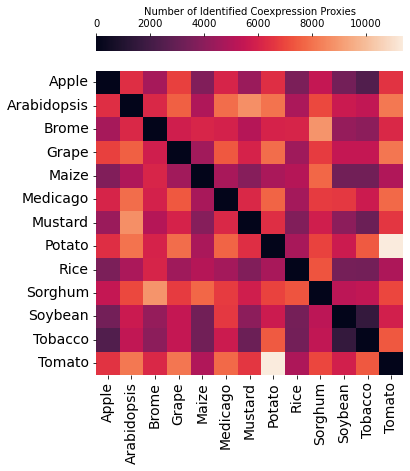

In [31]:
fig, ax = plt.subplots(figsize=(5.5,7))
sns.heatmap(data = moderate_final,cbar_kws={'label': 'Number of Identified Coexpression Proxies','location':'top',})
ax.tick_params(axis='x', labelsize = 14)
ax.tick_params(axis='y', labelsize = 14)

#plt.title('Number of Coexpression Proxies', fontsize = 20)
#plt.savefig('/data/passala/Plots_for_projects/Coexpressolog_paper_plots/updated_for_v11/heatmap_all_species_and_tomato_with_brome.svg')



AttributeError: 'ClusterGrid' object has no attribute 'tick_params'

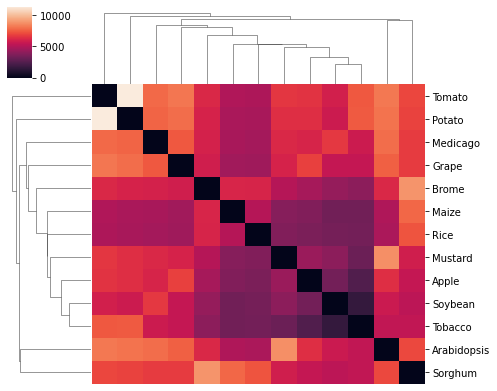

In [47]:
fig = sns.clustermap(moderate_final, metric = 'euclidean', figsize= (7,5.5),xticklabels = False,)
ax.tick_params(axis='x', labelsize = 14)
ax.tick_params(axis='y', labelsize = 14)

In [33]:

moderate_final_nans_reversed = 12000 - moderate_final 
moderate_final_nans_reversed = moderate_final_nans_reversed.replace(12000,0)
moderate_final_nans_reversed

,Apple,Arabidopsis,Brome,Grape,Maize,Medicago,Mustard,Potato,Rice,Sorghum,Soybean,Tobacco,Tomato
Apple,0.0,5639.0,7326.0,5136.0,8297.0,5932.0,7643.0,5652.0,8432.0,6529.0,8667.0,9574.0,5502.0
Arabidopsis,5639.0,0.0,5818.0,4425.0,7101.0,4138.0,3275.0,3999.0,7187.0,4989.0,6345.0,6611.0,3855.0
Brome,7326.0,5818.0,0.0,6155.0,5897.0,6014.0,6911.0,6003.0,5940.0,3131.0,7765.0,7975.0,5790.0
Grape,5136.0,4425.0,6155.0,0.0,7469.0,4608.0,5972.0,4118.0,7487.0,5290.0,6525.0,6543.0,3897.0
Maize,8297.0,7101.0,5897.0,7469.0,0.0,7294.0,8141.0,7222.0,6918.0,4237.0,8715.0,8705.0,7066.0
Medicago,5932.0,4138.0,6014.0,4608.0,7294.0,0.0,5817.0,4350.0,7385.0,5268.0,5387.0,6302.0,4235.0
Mustard,7643.0,3275.0,6911.0,5972.0,8141.0,5817.0,0.0,5644.0,8307.0,6173.0,7975.0,8884.0,5414.0
Potato,5652.0,3999.0,6003.0,4118.0,7222.0,4350.0,5644.0,0.0,7289.0,5103.0,6315.0,4556.0,643.0
Rice,8432.0,7187.0,5940.0,7487.0,6918.0,7385.0,8307.0,7289.0,0.0,4699.0,8596.0,8652.0,7159.0
Sorghum,6529.0,4989.0,3131.0,5290.0,4237.0,5268.0,6173.0,5103.0,4699.0,0.0,6745.0,6609.0,5014.0


In [34]:
linkage = hc.linkage(sp.distance.squareform(moderate_final_nans_reversed), method = 'average')

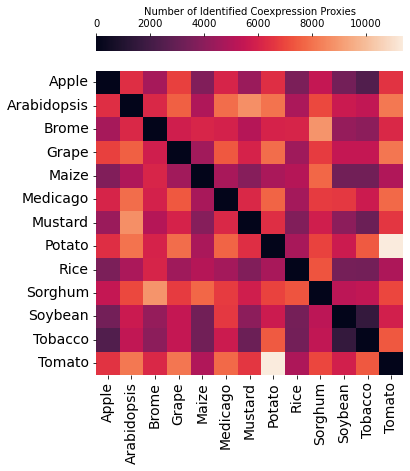

In [48]:
fig, ax = plt.subplots(figsize=(5.5,7))
sns.heatmap(data = moderate_final,cbar_kws={'label': 'Number of Identified Coexpression Proxies','location':'top',})
ax.tick_params(axis='x', labelsize = 14)
ax.tick_params(axis='y', labelsize = 14)

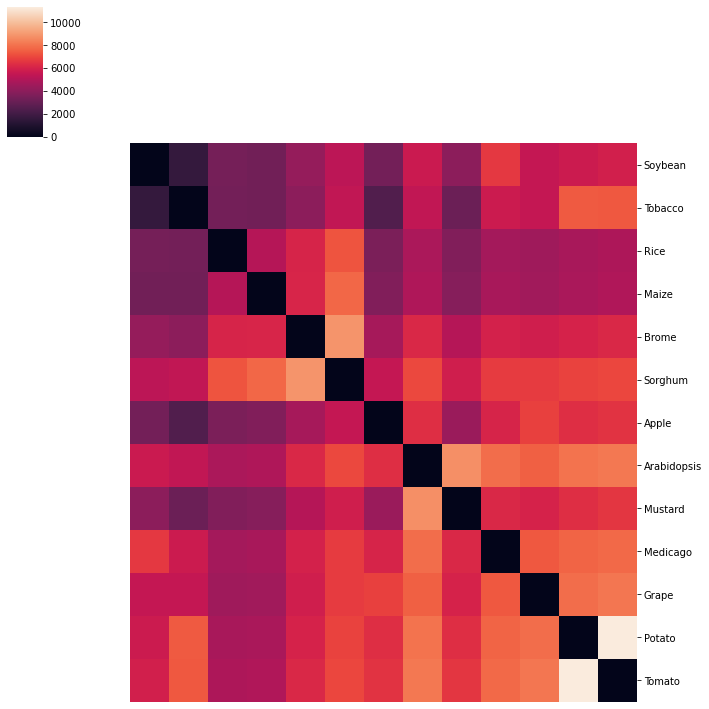

In [50]:

fig = sns.clustermap(moderate_final, row_linkage=linkage, col_linkage= linkage ,xticklabels = False,)
# ax.tick_params(axis='x', labelsize = 14)
# ax.tick_params(axis='y', labelsize = 14)
cluster_order = fig.dendrogram_row.reordered_ind
fig.ax_row_dendrogram.set_visible(False)
fig.ax_col_dendrogram.set_visible(False)

In [55]:
cluster_order =  moderate_final.iloc[cluster_order].index.tolist()

In [57]:
moderate_reorder = moderate_final.reindex(cluster_order)
moderate_reorder = moderate_reorder[cluster_order]
moderate_reorder

,Soybean,Tobacco,Rice,Maize,Brome,Sorghum,Apple,Arabidopsis,Mustard,Medicago,Grape,Potato,Tomato
Soybean,0.0,1559.0,3404.0,3285.0,4235.0,5255.0,3333.0,5655.0,4025.0,6613.0,5475.0,5685.0,5889.0
Tobacco,1559.0,0.0,3348.0,3295.0,4025.0,5391.0,2426.0,5389.0,3116.0,5698.0,5457.0,7444.0,7397.0
Rice,3404.0,3348.0,0.0,5082.0,6060.0,7301.0,3568.0,4813.0,3693.0,4615.0,4513.0,4711.0,4841.0
Maize,3285.0,3295.0,5082.0,0.0,6103.0,7763.0,3703.0,4899.0,3859.0,4706.0,4531.0,4778.0,4934.0
Brome,4235.0,4025.0,6060.0,6103.0,0.0,8869.0,4674.0,6182.0,5089.0,5986.0,5845.0,5997.0,6210.0
Sorghum,5255.0,5391.0,7301.0,7763.0,8869.0,0.0,5471.0,7011.0,5827.0,6732.0,6710.0,6897.0,6986.0
Apple,3333.0,2426.0,3568.0,3703.0,4674.0,5471.0,0.0,6361.0,4357.0,6068.0,6864.0,6348.0,6498.0
Arabidopsis,5655.0,5389.0,4813.0,4899.0,6182.0,7011.0,6361.0,0.0,8725.0,7862.0,7575.0,8001.0,8145.0
Mustard,4025.0,3116.0,3693.0,3859.0,5089.0,5827.0,4357.0,8725.0,0.0,6183.0,6028.0,6356.0,6586.0
Medicago,6613.0,5698.0,4615.0,4706.0,5986.0,6732.0,6068.0,7862.0,6183.0,0.0,7392.0,7650.0,7765.0


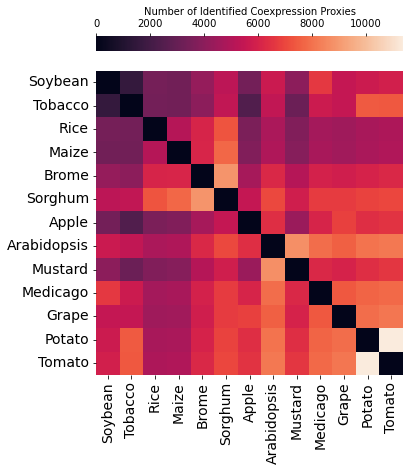

In [59]:
fig, ax = plt.subplots(figsize=(5.5,7))
sns.heatmap(data = moderate_reorder,cbar_kws={'label': 'Number of Identified Coexpression Proxies','location':'top',})
ax.tick_params(axis='x', labelsize = 14)
ax.tick_params(axis='y', labelsize = 14)
plt.savefig('/data/passala/Plots_for_projects/Coexpressolog_paper_plots/updated_for_v11/heatmap_all_species_and_tomato_with_brome.svg')

In [20]:
Stringent_table = pairwise_species_table[['Species 1','Species 2','Stringent Matches']]
Stringent_results = pd.DataFrame(columns = species_list, index = species_list, data = 0)
z = Stringent_table.pivot('Species 1', 'Species 2', 'Stringent Matches')
Stringent_final = Stringent_results.add(z, fill_value=0).add(z.T, fill_value=0)

/tmp/ipykernel_2209021/629082557.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  z = Stringent_table.pivot('Species 1', 'Species 2', 'Stringent Matches')


Text(0.5, 1.0, 'Stringent Threshold')

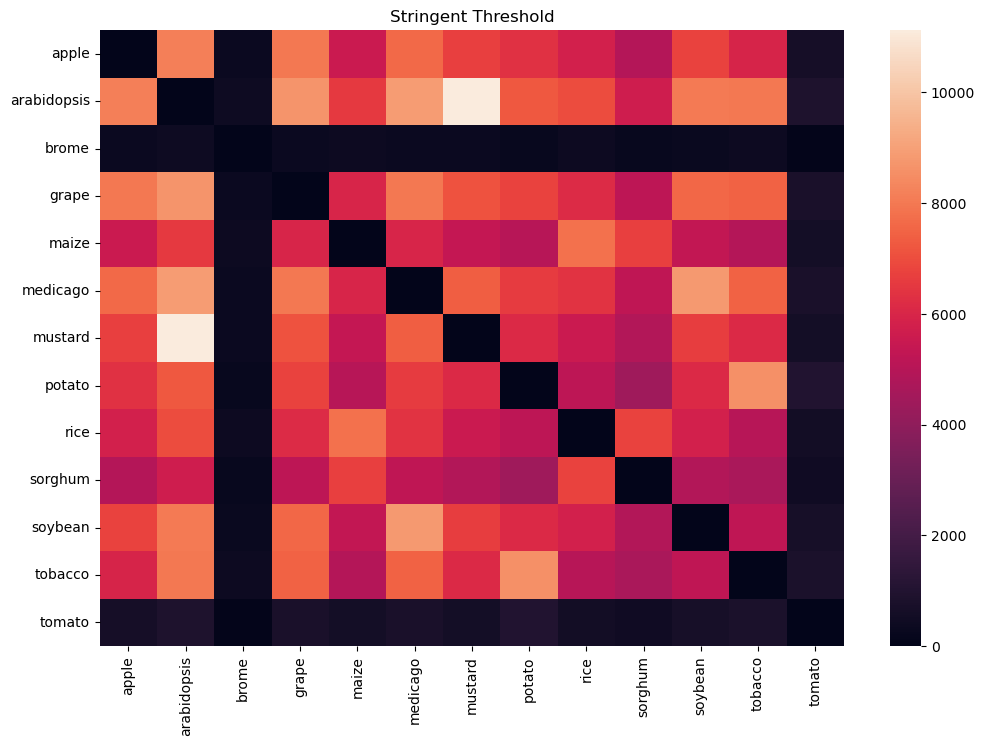

In [21]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(data = Stringent_final)
plt.title('Stringent Threshold')

In [22]:
Lenient_table = pairwise_species_table[['Species 1','Species 2','Lenient Matches']]
Lenient_results = pd.DataFrame(columns = species_list, index = species_list, data = 0)
z = Lenient_table.pivot('Species 1', 'Species 2', 'Lenient Matches')
Lenient_final = Lenient_results.add(z, fill_value=0).add(z.T, fill_value=0)

/tmp/ipykernel_2209021/1682090610.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  z = Lenient_table.pivot('Species 1', 'Species 2', 'Lenient Matches')


Text(0.5, 1.0, 'Lenient Threshold')

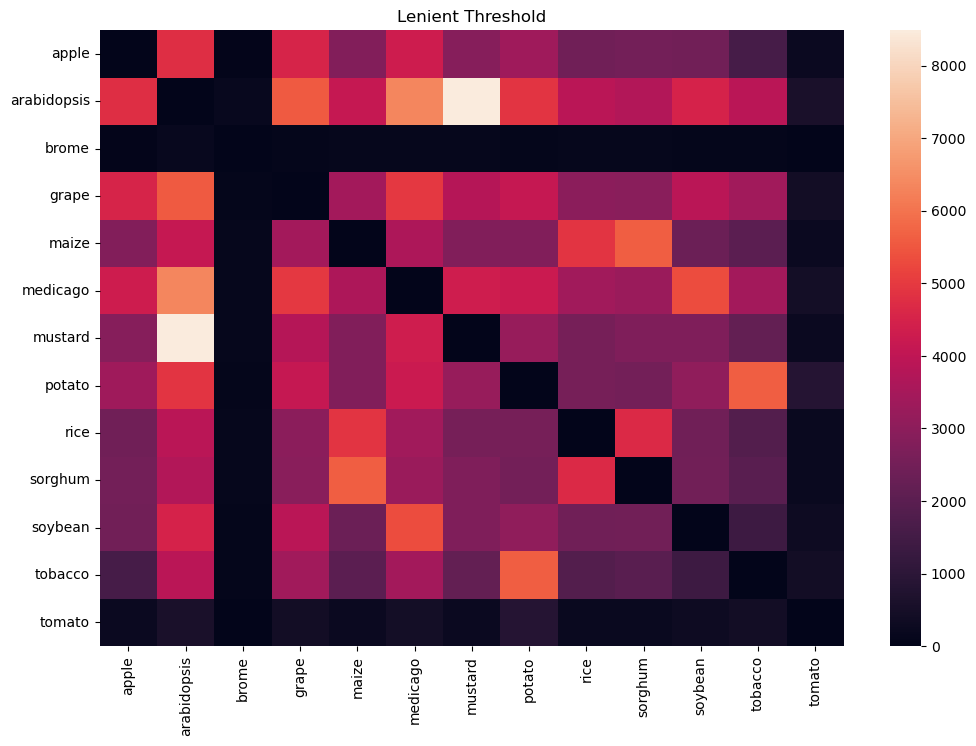

In [23]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(data = Lenient_final)
plt.title('Lenient Threshold')